In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle as cPickle

from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Bidirectional, LSTM, SimpleRNN, Input, GRU
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding, Dropout, Activation, MaxPooling1D,Conv1D
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.layers import Dense, BatchNormalization, LeakyReLU
from tensorflow.keras.initializers import glorot_uniform
from sklearn.metrics import confusion_matrix, matthews_corrcoef, accuracy_score,roc_auc_score
import sklearn.metrics as metrics
from keras import models

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path_train= "/content/drive/MyDrive/LBiPlantUbi/Data/"
path_test = "/content/drive/MyDrive/LBiPlantUbi/Data/"
path_result = "/content/drive/MyDrive/LBiPlantUbi/Result/"
path_model ="/content/drive/MyDrive/LBiPlantUbi/Model/"


In [4]:
filename_train = "trainset.csv"
filename_test = "testset.csv"
file_train = filename_train
file_test = filename_test
df_train = pd.read_csv(path_train + file_train,  delimiter= ',')
df_test= pd.read_csv(path_test + filename_test,  delimiter= ',')

In [5]:
# Def Dictionary
def Dic_1_gram():#Dictionary for 1_gram
    AA_list_sort = ['G','A','V','L','I','M','P','F','W','S','T','N','Q','Y','C','K','R','H','D','E','X']

    AA_dict = {}
    numm = 1
    for i in AA_list_sort:
        AA_dict[i] = numm
        numm += 1
    return AA_dict



In [6]:
# Separate words in sentences
def ProSentence(pro, K):
	sentence = ""
	length = len(pro)
	for i in range(length - K + 1):
		sentence += pro[i: i + K] + " "
    #delete extra space
	sentence = sentence[0 : len(sentence) - 1]
	return sentence
k =1#1-gram
word_index1 =  Dic_1_gram()
vocab_size = len(word_index1)

In [9]:
# preprocessing test data and index number vector
text_test =[] #PTMsequend kmer
for i in df_test['Sequence']:
  temp = ProSentence(i,k) #
  text_test.append(temp)
df_test['k_mer'] =text_test
test_sequences = []
for each in text_test:
    each_index_list = []
    each = each.split(' ')
    for i in each:
        each_index_list.append(word_index1[i])
    test_sequences.append(each_index_list)
data_token = []
for i in df_test['k_mer']:
   data_token.append(i.split())
print(data_token[:2])
MAX_SEQUENCE_LENGTH = len(data_token[1])
Xtest = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
ytest= df_test['Label']

[['D', 'L', 'S', 'G', 'R', 'E', 'T', 'L', 'V', 'R', 'I', 'T', 'G', 'G', 'M', 'K', 'V', 'K', 'A', 'D', 'R', 'D', 'E', 'S', 'S', 'P', 'Y', 'A', 'A', 'M', 'L'], ['S', 'G', 'R', 'E', 'T', 'L', 'V', 'R', 'I', 'T', 'G', 'G', 'M', 'K', 'V', 'K', 'A', 'D', 'R', 'D', 'E', 'S', 'S', 'P', 'Y', 'A', 'A', 'M', 'L', 'A', 'A']]


In [11]:
from keras import models
model_CNN = models.load_model(path_model +"CNN.h5")
y_prob_CNN = model_CNN.predict(Xtest)
#pd.DataFrame(y_prob_KD1[:,1], columns=['KD1_predictions_1gram']).to_csv(path +'prediction_1gram.csv')

47/47 [==============================] - 1s 10ms/step


In [12]:
from keras import models
model_LSTM = models.load_model(path_model +"LSTM.h5")
y_prob_LSTM = model_LSTM.predict(Xtest)


47/47 [==============================] - 1s 5ms/step


In [13]:
from keras import models
model_BiLSTM = models.load_model(path_model +"BiLSTM.h5")
y_prob_BiLSTM = model_BiLSTM.predict(Xtest)

47/47 [==============================] - 3s 25ms/step


In [14]:
from keras import models
model_CNNBiLSTM = models.load_model(path_model +"CNN_BiLSTM.h5")
y_prob_CNNBiLSTM = model_CNNBiLSTM.predict([Xtest,Xtest])

47/47 [==============================] - 6s 23ms/step


In [15]:
from keras import models
model_CNNLSTM = models.load_model(path_model +"CNN_LSTM.h5")
y_prob_CNNLSTM = model_CNNLSTM.predict([Xtest,Xtest])

47/47 [==============================] - 2s 14ms/step


In [16]:
# Load model LSTM_BiLSTM
from keras import models
model_hybrid = models.load_model(path_model +"LBiPlantUbi.h5")
y_prob_hybrid = model_hybrid.predict([Xtest,Xtest])

47/47 [==============================] - 3s 18ms/step


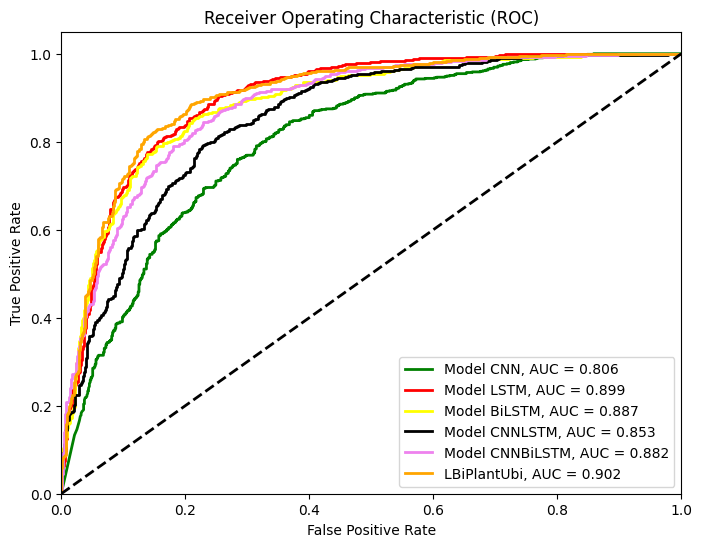

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np
from keras import models
from sklearn import metrics

y_true = ytest
# Calculate ROC curve and AUC for CNN model
fpr_CNN, tpr_CNN, thresholds_CNN  = metrics.roc_curve(y_true, y_prob_CNN)
roc_auc_CNN = auc(fpr_CNN, tpr_CNN)

# Calculate ROC curve and AUC for LSTM model
fpr_LSTM, tpr_LSTM, thresholds_LSTM  = metrics.roc_curve(y_true, y_prob_LSTM)
roc_auc_LSTM = auc(fpr_LSTM, tpr_LSTM)

# Calculate ROC curve and AUC for BiLSTM model
fpr_BiLSTM, tpr_BiLSTM, thresholds_BiLSTM  = metrics.roc_curve(y_true, y_prob_BiLSTM)
roc_auc_BiLSTM = auc(fpr_BiLSTM, tpr_BiLSTM)

# Calculate ROC curve and AUC for CNNBiLSTM model
fpr_CNNBiLSTM, tpr_CNNBiLSTM, thresholds_CNNBiLSTM  = metrics.roc_curve(y_true, y_prob_CNNBiLSTM)
roc_auc_CNNBiLSTM = auc(fpr_CNNBiLSTM, tpr_CNNBiLSTM)

# Calculate ROC curve and AUC for CNNLSTM model
fpr_CNNLSTM, tpr_CNNLSTM, thresholds_CNNLSTM  = metrics.roc_curve(y_true, y_prob_CNNLSTM)
roc_auc_CNNLSTM = auc(fpr_CNNLSTM, tpr_CNNLSTM)

# Calculate ROC curve and AUC for LSTM_BiLSTM model
fpr_hybrid, tpr_hybrid, thresholds_hybrid  = metrics.roc_curve(y_true, y_prob_hybrid)
roc_auc_hybrid = auc(fpr_hybrid, tpr_hybrid)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_CNN, tpr_CNN, color='green', lw=2, label='Model CNN, AUC = {:.3f}'.format(roc_auc_CNN))
plt.plot(fpr_LSTM, tpr_LSTM, color='red', lw=2, label='Model LSTM, AUC = {:.3f}'.format(roc_auc_LSTM))
plt.plot(fpr_BiLSTM, tpr_BiLSTM, color='yellow', lw=2, label='Model BiLSTM, AUC = {:.3f}'.format(roc_auc_BiLSTM))
plt.plot(fpr_CNNLSTM, tpr_CNNLSTM, color='black', lw=2, label='Model CNNLSTM, AUC = {:.3f}'.format(roc_auc_CNNLSTM))
plt.plot(fpr_CNNBiLSTM, tpr_CNNBiLSTM, color='Violet', lw=2, label='Model CNNBiLSTM, AUC = {:.3f}'.format(roc_auc_CNNBiLSTM))
plt.plot(fpr_hybrid, tpr_hybrid, color='Orange', lw=2, label='LBiPlantUbi, AUC = {:.3f}'.format(roc_auc_hybrid))
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()